# Data Preparation Books Recommendation System

## Introduction
Preparing the data for modelling is an important step towards fruitful predictive results. 

The objectives of a Preparation notebook are as follows:

    * Handle the remarks regarding data observed in the EDA;
    * Enrich the dataset provided if needed for better model performance;
    * Decide on features that are going to be included in the forecasting model;


## Libraries

First of all, a few libraries are needed to work with and plot the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Visualization enhancement
Secondly, adjust plots size for better visualization experience.

#### Increase the size of plots to be able to see detailed visualizations clear

In [2]:
plt.rcParams["figure.figsize"] = [25, 10]
plt.rcParams.update({'font.size': 24})

## Dataset

Finally, download the combined dataset supplied after executing EDA and review it. 

In [3]:
df = pd.read_csv('CleanedFoundation.csv', error_bad_lines=False, delimiter=',', encoding = 'ISO-8859-1') 
df

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,tyler,texas,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,cincinnati,ohio,usa,20-24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,strafford,missouri,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,st. charles county,missouri,usa,0-9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,beaverton,oregon,usa,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...,...
984579,276681,0140290788,9,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books
984580,276681,0609806491,7,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA)
984581,276681,0764504444,0,chicago,illinois,usa,40-49,Access 2000 for Windows for Dummies,John Kaufeld,1999,For Dummies
984582,276681,1931333246,10,chicago,illinois,usa,40-49,Chorus,Kurt Messick,2003,Dry Bones Press


## Rarities observed in the EDA

#### Inputs of 0 for book rating

As stated in the conclusion section of the EDA there can be found many 0 ratings - 600 000+, which corresponds to ~60% of the rows:

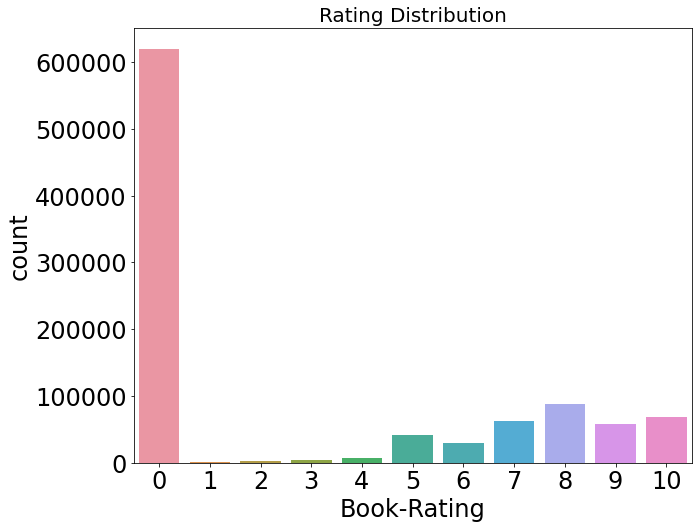

In [4]:
plt.figure(figsize=(10,8))
sns.countplot(x='Book-Rating',data=df)
plt.title('Rating Distribution',size=20)
plt.show()

Dive more into this subject. Check whether some books have no other rating score except for 0.

In [5]:
# Extract the books which have only one unique input for rating
df_xtrct = df.groupby('ISBN').filter(lambda x: x['Book-Rating'].nunique() == 1)
df_xtrct

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
178,276729,052165615X,3,rijeka,NaN,croatia,10-19,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
179,276729,0521795028,6,rijeka,NaN,croatia,10-19,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
926,276746,0786014512,0,fort worth,",",usa,40-49,Make Them Cry,Kevin O'Brien,2002,Pinnacle Books
927,16795,0786014512,0,mechanicsville,maryland,usa,40-49,Make Them Cry,Kevin O'Brien,2002,Pinnacle Books
928,35859,0786014512,0,duluth,minnesota,usa,40-49,Make Them Cry,Kevin O'Brien,2002,Pinnacle Books
...,...,...,...,...,...,...,...,...,...,...,...
984579,276681,0140290788,9,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books
984580,276681,0609806491,7,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA)
984581,276681,0764504444,0,chicago,illinois,usa,40-49,Access 2000 for Windows for Dummies,John Kaufeld,1999,For Dummies
984582,276681,1931333246,10,chicago,illinois,usa,40-49,Chorus,Kurt Messick,2003,Dry Bones Press


In [6]:
# Get the books which have only 0 for rating
df_xtrct = df_xtrct[df_xtrct['Book-Rating'] == 0]
df_xtrct

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
926,276746,0786014512,0,fort worth,",",usa,40-49,Make Them Cry,Kevin O'Brien,2002,Pinnacle Books
927,16795,0786014512,0,mechanicsville,maryland,usa,40-49,Make Them Cry,Kevin O'Brien,2002,Pinnacle Books
928,35859,0786014512,0,duluth,minnesota,usa,40-49,Make Them Cry,Kevin O'Brien,2002,Pinnacle Books
929,66385,0786014512,0,round rock,texas,usa,30-34,Make Them Cry,Kevin O'Brien,2002,Pinnacle Books
930,83034,0786014512,0,fairbanks,alaska,usa,40-49,Make Them Cry,Kevin O'Brien,2002,Pinnacle Books
...,...,...,...,...,...,...,...,...,...,...,...
984576,276680,086505505X,0,hopewell junction,new york,usa,50-59,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company
984577,276680,1564407284,0,hopewell junction,new york,usa,50-59,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot
984578,276680,1582343594,0,hopewell junction,new york,usa,50-59,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA
984581,276681,0764504444,0,chicago,illinois,usa,40-49,Access 2000 for Windows for Dummies,John Kaufeld,1999,For Dummies


In [7]:
df_xtrct['ISBN'].nunique()

97673

97 673 books which have been rated only once and with a 0. It is unclear whether this is a mistake marking low quality of the dataset or so many books have been truly rated with 0. Take an overview of the top 10 books in this extracted dataset:

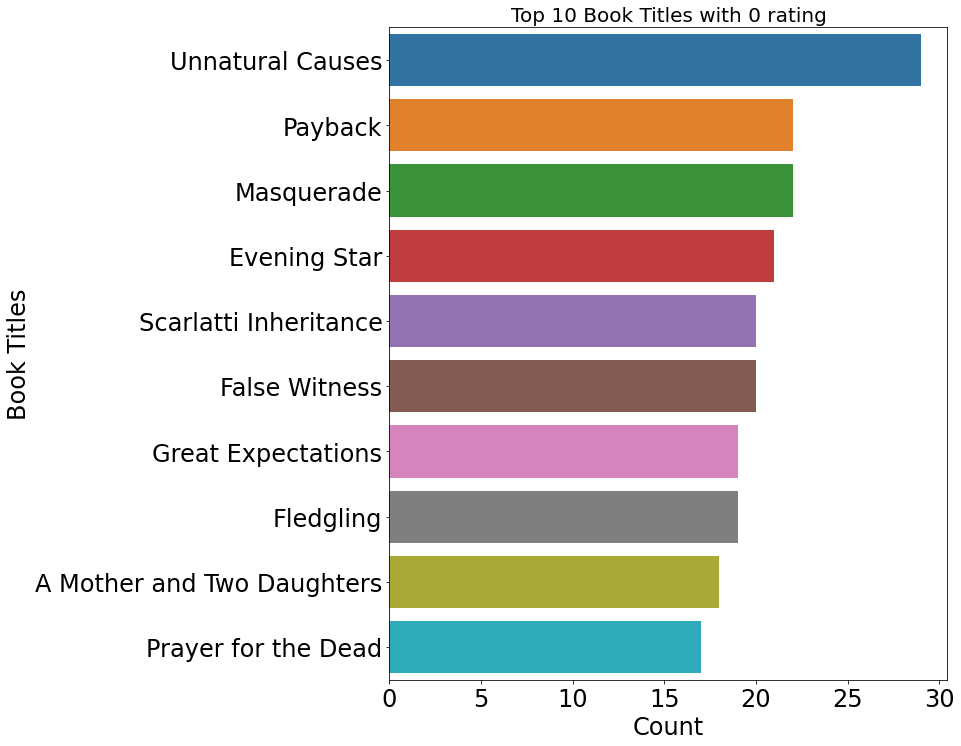

In [8]:
df_plot = df_xtrct['Book-Title'].value_counts().head(10).reset_index()
df_plot.columns = ['Book-Title', 'Count']

plt.figure(figsize=(10,12))
sns.barplot(x='Count',y='Book-Title',data=df_plot)
plt.ylabel("Book Titles")
plt.title("Top 10 Book Titles with 0 rating",size=20)
plt.show()

Looking at the books titles and Googling the first two for example, I find really high reviews. Therefore, it makes no sense having only rating of 0 for this book and approximately 30 in count. Let's look at the authors of the books with only rating of 0 :

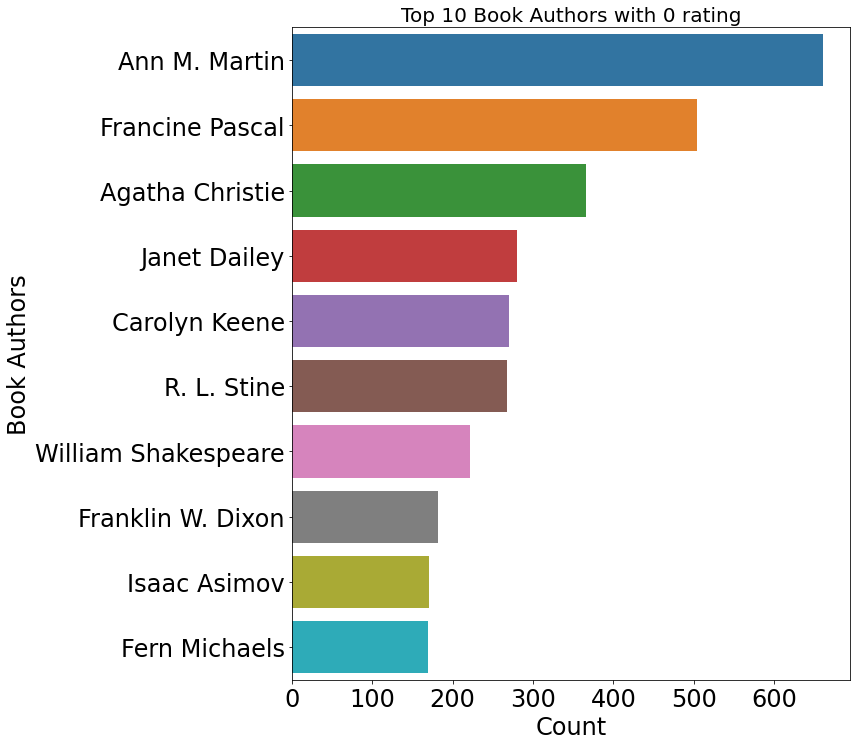

In [9]:
df_plot = df_xtrct['Book-Author'].value_counts().head(10).reset_index()
df_plot.columns = ['Book-Author', 'Count']

plt.figure(figsize=(10,12))
sns.barplot(x='Count',y='Book-Author',data=df_plot)
plt.ylabel("Book Authors")
plt.title("Top 10 Book Authors with 0 rating",size=20)
plt.show()

The authors of the books with rating 0 are well-known and it is unexpected have so many rated books with 0. For instance, Agatha Christie has nearly 400 inputs of 0 as rating for her books, or William Shakespeare with more than 200. 
<br><br> Based on the observations above, the 0 rating inputs are illogical and confusing. Therefore, to avoid irrelevant performance during modeling, all 0 ratings should be removed, as column Book-Rating is key for personalized recommendations.

In [10]:
df.drop(df[df['Book-Rating'] == 0].index, inplace=True)
df

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,2313,034545104X,5,cincinnati,ohio,usa,20-24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,st. charles county,missouri,usa,0-9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,beaverton,oregon,usa,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
9,50403,034545104X,9,conway,arkansas,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
13,63970,034545104X,8,springfield,missouri,usa,25-29,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...,...
984567,276680,0671516949,7,hopewell junction,new york,usa,50-59,A MARRIAGE MADE AT WOODSTOCK,Cathie Pelletier,1995,Washington Square Press
984568,276680,067179387X,9,hopewell junction,new york,usa,50-59,The WEIGHT OF WINTER,Cathie Pelletier,1993,Washington Square Press
984579,276681,0140290788,9,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books
984580,276681,0609806491,7,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA)


In [11]:
df[df['Book-Rating'] == 0]

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher


Rows with 0 rating value have been successfully removed. However, the size of the dataset has fallen down with ~60%. Overview of the new counts of unique books, users and explicit ratings provided per user should take place, because these features are fundamental for developing the system.

#### Year of Publication (YOP) equals to 0

An average amount of books without provided YOP has been observed in the EDA. Get an overview of the matter after removing all rows with rating 0.

In [12]:
df[df['Year-Of-Publication'] == 0]

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
1886,134837,0571058086,10,kuala lumpur,wilayah persekutuan,malaysia,25-29,Waiting for Godot,Samuel Beckett,0,Faber Faber Inc
1887,180430,0571058086,6,roma,lazio,italy,10-19,Waiting for Godot,Samuel Beckett,0,Faber Faber Inc
1891,276077,0571058086,3,badalona,catalonia,spain,25-29,Waiting for Godot,Samuel Beckett,0,Faber Faber Inc
2497,21070,3423084049,7,dresden,sachsen,germany,25-29,Der Englishche Patient,Michael Ondaatje,0,Deutscher Taschenbuch Verlag (DTV)
2498,36137,3423084049,9,aachen,nordrhein-westfalen,germany,25-29,Der Englishche Patient,Michael Ondaatje,0,Deutscher Taschenbuch Verlag (DTV)
...,...,...,...,...,...,...,...,...,...,...,...
983405,273718,1853266000,5,london,england,united kingdom,30-34,Perfumed Garden of the Sheikh Nefzaoui,Nefzaoui,0,Universal Sales Marketing
983949,274656,1843090619,10,brighton,michigan,usa,40-49,French - Delicious Classic Cuisine,Carole Clements,0,Anness Publishing
984158,275667,8807811073,7,montespertoli,toscana,italy,10-19,Garzanti - Gli Elefanti: Il Giudice E Il Suo Boia,F Durrenmatt,0,Feltrinelli
984491,276538,3150000629,6,cologne,",",germany,25-29,Konig Richard Der Dritte,William Shakespeare,0,"Philipp Reclam, Jun Verlag GmbH"


The chances are ~0%, but just to be sure, check whether a book has more than one input for YOP:

In [13]:
df_xtrct = df.groupby('ISBN')['Year-Of-Publication'].nunique().sort_values(ascending=False)
df_xtrct

ISBN
B000234N3A    1
0440961653    1
044100508X    1
0441005098    1
0441005136    1
             ..
0809239965    1
0809239973    1
0809240068    1
0809240742    1
0000913154    1
Name: Year-Of-Publication, Length: 131324, dtype: int64

There are no rows with variations of the YOP for a book. Get how many books are missing YOP:

In [14]:
df_xtrct = df[df['Year-Of-Publication'] == 0]
df_xtrct['ISBN'].nunique()

2380

**2 380 books** in total are missing YOP.
<br><br> This information will be valuable and can be extracted by web scraping a public site. For the purpose, all rows which are missing the YOP are extracted in the following table:

In [15]:
df_isbn = pd.DataFrame(df[{'ISBN', 'Year-Of-Publication'}])
df_isbn = df_isbn[df_isbn['Year-Of-Publication'] == 0]
df_isbn.drop_duplicates(subset = ['ISBN'], keep = 'first', inplace = True) 
df_isbn

,Year-Of-Publication,ISBN
1886,0,0571058086
2497,0,3423084049
2847,0,0439104769
3050,0,8478885218
3466,0,2038701962
...,...,...
983405,0,1853266000
983949,0,1843090619
984158,0,8807811073
984491,0,3150000629


The website *Goodreads.com* was used to extract the missing YOP with the following function:

In [16]:
def getYOP_GoodReads(i, search_isbn):
    driver = webdriver.Chrome('chromedriver.exe')
    driver.get('https://www.goodreads.com/')
    e = driver.find_element_by_id('sitesearch_field')
    e.send_keys(search_isbn)
    e.send_keys(Keys.ENTER)
    soup = BeautifulSoup(driver.page_source, "html")
    parent_node = soup.find("div", {"id": "details"})

    try:
        yop = 0
        children = parent_node.findChildren("div", recursive=False)
        for child in children:
            if(child.findChildren("span", recursive=False)):
                continue
            else:
                try:
                    yop = child.findChildren("nobr", recursive=False)[0].text.strip()[-5:][:-1]
                except:
                    yop = child.text.splitlines()[2].strip()[-4:]
                break
    except:
        children = ''
    try:
        df_isbn.at[i, 'Year-Of-Publication'] = yop
    except:
        df_isbn.at[i, 'Year-Of-Publication'] = 0
    print(len(df_isbn[df_isbn['Year-Of-Publication'] == 0]))
    driver.close()

After iterating over the rows, the extracted table has been filled in to a great extend:

In [17]:
df_isbn = pd.read_csv('ISBN_YOP.csv', error_bad_lines=False, delimiter=',', encoding = 'ISO-8859-1') 
df_isbn[df_isbn['Year-Of-Publication'] == 0]

,Year-Of-Publication,ISBN
8,0,8420457477
9,0,2010173929
96,0,2266033689
114,0,0307177092
129,0,0340612843
...,...,...
2360,0,0307231534
2361,0,0590366572
2365,0,0861630114
2367,0,0861889088


There are still some missing YOP inputs (231) due to the fact that some books were not found in the collection of *Goodreads.com* or YOP was not specified there. The website *Amazon.com* was used to further extract missing YOP using the following function:

In [18]:
def getYOP_Amazon(i, search_isbn):
    driver = webdriver.Chrome('chromedriver.exe')
    driver.get('https://www.amazon.com')
    e = driver.find_element_by_id('twotabsearchtextbox')
    e.send_keys(search_isbn)
    e.send_keys(Keys.ENTER)
    soup = BeautifulSoup(driver.page_source, "html")
    parent_node = soup.find("span", {"data-component-type": "s-search-results"})
    try:
        children = parent_node.findChildren("div", recursive=False)
        for child in children:
            if(child.find("a", {"href" : re.compile(r".*")})):
                link = child.find("a", {"href" : re.compile(r".*")})['href']
                driver.get('https://www.amazon.com' + link)
                break
    except:
        link = ''
        
#     Book's page
    if(link != ""):
        soup = BeautifulSoup(driver.page_source, "html")
        descr_children = soup.findAll("div", {"class": "rpi-attribute-content"})
        try:
            for child in descr_children:
                if(child.find(lambda tag:tag.name=="span" and "date" in tag.text)):
                    yop_holder = child.find("div", {"class": "rpi-attribute-value"})
                    yop = yop_holder.findChildren("span", recursive=False)[0].text.strip()[-4:]
                    break
        except:
            yop = 0

    try:
        df_isbn.at[i, 'Year-Of-Publication'] = yop
    except:
        df_isbn.at[i, 'Year-Of-Publication'] = 0
    print(len(df_isbn[df_isbn['Year-Of-Publication'] == 0]))
    driver.close()

After iterating over the rows, the extracted table has been almost fully completed:

In [19]:
df_add = pd.read_csv('ISBN_YOP_Add.csv', error_bad_lines=False, delimiter=',', encoding = 'ISO-8859-1') 

# Merge Goodreads results with Amazon:
df_suppl = pd.merge(df_isbn, df_add, on='ISBN', how='left')
df_suppl['Year-Of-Publication_x'] = np.where((df_suppl['Year-Of-Publication_y'].notnull()),
                                                df_suppl['Year-Of-Publication_y'], df_suppl['Year-Of-Publication_x'])
# Drop extra YOP column 
df_suppl.drop(labels=['Year-Of-Publication_y'], axis=1, inplace = True)
df_suppl = df_suppl.rename(columns={"Year-Of-Publication_x": "Year-Of-Publication"})

df_suppl[df_suppl['Year-Of-Publication'] == 0].nunique()

Year-Of-Publication     1
ISBN                   92
dtype: int64

92 books are left with value 0 for YOP. How many times have these books been rated:

In [20]:
df_xtrct = df_suppl[df_suppl['Year-Of-Publication'] == 0]
df_compare = df[df['ISBN'].isin(df_xtrct['ISBN'])]
df_compare

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
4971,206865,2010173929,8,poitiers,vienne,france,20-24,La Citadelle Du Vertige,Grousset,0,Hachette
228176,153662,0307177092,6,ft. stewart,georgia,usa,40-49,Peters Welcom Tell a Tale Book,Maida Silverman,0,Golden Books
242594,1850,0340612843,7,sydney,nsw,australia,0-9,Love Me Tender (Starlight),Libby Hathorn,0,Hodder Headline Australia
363363,6731,5553531144,7,buford,georgia,usa,25-29,Human Dignity and Freedom-25.95,Universe Publishing Co,0,First Glance Books
406066,8890,2020062143,7,paris,ile-de-france,france,40-49,La Barbare,Pancol,0,Editions du Seuil
...,...,...,...,...,...,...,...,...,...,...,...
973481,247499,3548207162,8,ratingen,nordrhein-westfalen,germany,40-49,Ein Stuck Vom Leben,Noack,0,"Ullstein-Taschenbuch-Verlag, Zweigniederlassun..."
978970,260438,3817025181,5,wabern,be,switzerland,50-59,Rom Roma Rome,Mielke Wolfgang,0,Gingko Press
981710,268932,0590366572,6,red deer,alberta,canada,35-39,Titanic,Richard Wormser,0,Scholastic Inc
982121,269566,0861630114,5,seattle,washington,usa,0-9,Snow White and the Seven Dwarfs (An Award Clas...,Kay Brown,0,Award Publications


Most of these books have been rated only once and are overall low in quantity. Therefore, missing their Year-Of-Publication input would not impede initial work. If the values are necessary, they can be manually collected in the future.

Transfer the found YOP values in the main dataset:

In [21]:
df_enriched = pd.merge(df, df_suppl, on='ISBN', how='left')
df_enriched

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication_x,Publisher,Year-Of-Publication_y
0,2313,034545104X,5,cincinnati,ohio,usa,20-24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN
1,8680,034545104X,5,st. charles county,missouri,usa,0-9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN
2,10314,034545104X,9,beaverton,oregon,usa,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN
3,50403,034545104X,9,conway,arkansas,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN
4,63970,034545104X,8,springfield,missouri,usa,25-29,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
364261,276680,0671516949,7,hopewell junction,new york,usa,50-59,A MARRIAGE MADE AT WOODSTOCK,Cathie Pelletier,1995,Washington Square Press,NaN
364262,276680,067179387X,9,hopewell junction,new york,usa,50-59,The WEIGHT OF WINTER,Cathie Pelletier,1993,Washington Square Press,NaN
364263,276681,0140290788,9,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books,NaN
364264,276681,0609806491,7,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA),NaN


Transfer the values from the additionally added column to the main Year-Of-Birth column:

In [22]:
df_enriched['Year-Of-Publication_x'] = np.where((df_enriched['Year-Of-Publication_y'].notnull()),
                                                df_enriched['Year-Of-Publication_y'], df_enriched['Year-Of-Publication_x'])
df_enriched[df_enriched['Year-Of-Publication_x'] == 0].nunique()

User-ID                  92
ISBN                     92
Book-Rating               9
City                     82
State                    62
Country                  15
Age-Range                 9
Book-Title               92
Book-Author              89
Year-Of-Publication_x     1
Publisher                78
Year-Of-Publication_y     1
dtype: int64

Transfering has been successful as there are 92 books left without YOP in the enriched dataset as was expected. Drop the last column as the information from it is already in the original YOP column.

In [23]:
df_enriched.drop(labels=['Year-Of-Publication_y'], axis=1, inplace = True)
df_enriched = df_enriched.rename(columns={"Year-Of-Publication_x": "Year-Of-Publication"})
df = df_enriched
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype("int")
df

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2313,034545104X,5,cincinnati,ohio,usa,20-24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,8680,034545104X,5,st. charles county,missouri,usa,0-9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,10314,034545104X,9,beaverton,oregon,usa,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,50403,034545104X,9,conway,arkansas,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,63970,034545104X,8,springfield,missouri,usa,25-29,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...,...
364261,276680,0671516949,7,hopewell junction,new york,usa,50-59,A MARRIAGE MADE AT WOODSTOCK,Cathie Pelletier,1995,Washington Square Press
364262,276680,067179387X,9,hopewell junction,new york,usa,50-59,The WEIGHT OF WINTER,Cathie Pelletier,1993,Washington Square Press
364263,276681,0140290788,9,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books
364264,276681,0609806491,7,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA)


Irrelevant YOP input has been handled.

#### Variations in ISBN for the same Book-Title
Presence of books with various ISBN numbers for the same title has been observed in the EDA. Get an overview of these instances:

In [24]:
irrelevant = df.loc[np.where(df.groupby(['Book-Title'])['ISBN'].nunique() > 1)]
irrelevant

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
43,63507,0446520802,8,lomita,california,usa,30-34,The Notebook,Nicholas Sparks,1996,Warner Books
86,276729,0521795028,6,rijeka,NaN,croatia,10-19,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
99,31315,038550120X,6,henryville,indiana,usa,30-34,A Painted House,JOHN GRISHAM,2001,Doubleday
121,111358,038550120X,7,cameron,west virginia,usa,60-69,A Painted House,JOHN GRISHAM,2001,Doubleday
165,258334,038550120X,5,pinckney,michigan,usa,30-34,A Painted House,JOHN GRISHAM,2001,Doubleday
...,...,...,...,...,...,...,...,...,...,...,...
118515,62464,1400032806,10,el cajon,california,usa,25-29,Under the Banner of Heaven : A Story of Violen...,JON KRAKAUER,2004,Anchor
118604,123825,0451146425,8,vancouver,british columbia,canada,40-49,Lie Down With Lions,Ken Follett,1986,New Amer Library (Mm)
118616,89347,0380817446,7,asheville,north carolina,usa,25-29,The Legend of Bagger Vance,Steven Pressfield,2000,HarperTorch
118638,75591,0345379330,8,charleston,west virginia,usa,30-34,"Mostly Harmless (Hitchhiker's Trilogy, No 5)",Douglas Adams,1993,Ballantine Books


In [25]:
print("{} book titles have variations in the ISBN number".format(irrelevant['Book-Title'].nunique()))

3516 book titles have variations in the ISBN number


Let us take a few titles from the table above:

In [26]:
df[df['Book-Title'] == 'The Notebook']

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
29,7158,0446520802,10,omaha,nebraska,usa,30-34,The Notebook,Nicholas Sparks,1996,Warner Books
30,8253,0446520802,10,tulsa,oklahoma,usa,25-29,The Notebook,Nicholas Sparks,1996,Warner Books
31,11676,0446520802,10,NaN,NaN,NaN,40-49,The Notebook,Nicholas Sparks,1996,Warner Books
32,12589,0446520802,9,lincoln,nebraska,usa,40-49,The Notebook,Nicholas Sparks,1996,Warner Books
33,13279,0446520802,10,moodus,connecticut,usa,40-49,The Notebook,Nicholas Sparks,1996,Warner Books
...,...,...,...,...,...,...,...,...,...,...,...
180408,255413,0446676098,8,columbia,missouri,usa,40-49,The Notebook,Nicholas Sparks,1999,Warner Books
180409,258938,0446676098,10,los angeles,california,usa,25-29,The Notebook,Nicholas Sparks,1999,Warner Books
180410,267510,0446676098,10,klang,selangor,malaysia,20-24,The Notebook,Nicholas Sparks,1999,Warner Books
180411,274004,0446676098,6,sydenham,london,"england, united kingdom",40-49,The Notebook,Nicholas Sparks,1999,Warner Books


In this case both the year of publication and the publisher have differences among the rows.

In [27]:
df[df['Book-Title'] == 'A Painted House']

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
89,276744,038550120X,7,torrance,california,usa,30-34,A Painted House,JOHN GRISHAM,2001,Doubleday
90,11676,038550120X,10,NaN,NaN,NaN,40-49,A Painted House,JOHN GRISHAM,2001,Doubleday
91,16877,038550120X,9,houston,arkansas,usa,35-39,A Painted House,JOHN GRISHAM,2001,Doubleday
92,17975,038550120X,6,fargo,north dakota,usa,40-49,A Painted House,JOHN GRISHAM,2001,Doubleday
93,20806,038550120X,6,union,kentucky,usa,30-34,A Painted House,JOHN GRISHAM,2001,Doubleday
...,...,...,...,...,...,...,...,...,...,...,...
14997,275800,044023722X,8,st. cloud,minnesota,usa,50-59,A Painted House,John Grisham,2001,Dell Publishing Company
14998,276017,044023722X,8,quinton,alabama,usa,35-39,A Painted House,John Grisham,2001,Dell Publishing Company
14999,276071,044023722X,10,littleton,colorado,usa,25-29,A Painted House,John Grisham,2001,Dell Publishing Company
324525,116904,0385337930,10,san antonio,texas,usa,35-39,A Painted House,JOHN GRISHAM,2004,Delta


In this case, the publisher varies.

In [28]:
df[df['Book-Title'] == "It"]

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
97965,4334,0451149513,8,rome,lazio,italy,35-39,It,Stephen King,1987,New Amer Library
97966,11676,0451149513,8,NaN,NaN,NaN,40-49,It,Stephen King,1987,New Amer Library
97967,37293,0451149513,8,whitehorse,yukon territory,canada,40-49,It,Stephen King,1987,New Amer Library
97968,53392,0451149513,10,minneapolis,minnesota,usa,30-34,It,Stephen King,1987,New Amer Library
97969,64346,0451149513,10,alvin,texas,usa,25-29,It,Stephen King,1987,New Amer Library
...,...,...,...,...,...,...,...,...,...,...,...
197052,253107,0451169514,9,liverpool,england,united kingdom,60-69,It,Stephen King,1997,Signet Book
197053,258534,0451169514,10,mcqueeney,texas,usa,30-34,It,Stephen King,1997,Signet Book
197054,259901,0451169514,8,thompson,manitoba,canada,25-29,It,Stephen King,1997,Signet Book
197055,265014,0451169514,10,oakland,california,usa,40-49,It,Stephen King,1997,Signet Book


The book *It* combines both different publication year and publisher.

It seems that the year of publication (YOP) and/or the publisher vary, author is the same. According to *Wikipedia*, an ISBN is assigned to each separate edition and variation (except reprintings) of a publication. For example, an e-book, a paperback and a hardcover edition of the same book will each have a different ISBN. 


Due to the lack of further provided information regarding the book format, it is best to unify the ISBN numbers of the same book title with the most common ISBN to avoid ambiguity during further modeling. Indeed, the idea of the system is only to recommend books and the book format does not take place in the purpose of the technology.

In [29]:
df['ISBN'] = df.groupby(['Book-Title'])['ISBN'].transform(lambda x: x.mode()[0] if x.nunique() > 1 else x)

In [30]:
(df.groupby('Book-Title')['ISBN'].nunique() > 1).any()

False

There are no more various inputs in column *ISBN* for each book title. Check if indeed the most frequent value has been used for the role of replacing value:

In [31]:
a = df[(df['Book-Title'] == 'The Notebook') | (df['Book-Title'] == 'A Painted House') | (df['Book-Title'] == 'It')]
a['ISBN'].unique()

array(['0446605239', '044023722X', '0451169514'], dtype=object)

The values have been correctly replaced with mode value and now there is only one ISBN for each unique title.

## Valuable statistics
Extract a few important counts of the key features for recommending books. 
<br> * *Users* - needed for personal recommendations
<br> * *Books* - the foundation of the system
<br> * *Ratings* - the correlation between books and users & key for taste detection

#### Unique users - 65 390
The amount of readers in the system is large.

In [32]:
df['User-ID'].nunique()

65390

#### Unique books - 118 721
There is a great variety of books to develop and test the system.

In [33]:
df['ISBN'].nunique()

118721

#### Average count of books rated per user - 5 to 6
5 to 6 books rated per reader to detect their taste. 

In [34]:
df.groupby('User-ID')['ISBN'].nunique().mean()

5.556445939746139

## Enrich for better modeling results
A few additional columns will be needed for suggesting publicly acclaimed books to new users who are new to the system. The idea behind this feature is that such books will have a higher probability of being liked by the average audience.

#### Average rating per book
Add a supplementary column for average rating regarding each book. This way, each book will be classified as approved or not by the mass of its readers.

In [35]:
# Create a new column and fill it with average rating per ISBN
df['AVG-Rating'] = df.groupby('ISBN')['Book-Rating'].transform('mean')

# Adjust position to be right after Book-Rating
ratings = df['AVG-Rating']
df.drop(labels=['AVG-Rating'], axis=1, inplace = True)
df.insert(3, 'AVG-Rating', ratings)

In [36]:
df

,User-ID,ISBN,Book-Rating,AVG-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2313,034545104X,5,6.285714,cincinnati,ohio,usa,20-24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,8680,034545104X,5,6.285714,st. charles county,missouri,usa,0-9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,10314,034545104X,9,6.285714,beaverton,oregon,usa,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,50403,034545104X,9,6.285714,conway,arkansas,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,63970,034545104X,8,6.285714,springfield,missouri,usa,25-29,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...,...,...
364261,276680,0671516949,7,7.000000,hopewell junction,new york,usa,50-59,A MARRIAGE MADE AT WOODSTOCK,Cathie Pelletier,1995,Washington Square Press
364262,276680,067179387X,9,9.000000,hopewell junction,new york,usa,50-59,The WEIGHT OF WINTER,Cathie Pelletier,1993,Washington Square Press
364263,276681,0140290788,9,9.000000,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books
364264,276681,0609806491,7,7.000000,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA)


#### Total count of raters per book
Add a supplementary column for total raters regarding each book. This way, a selection of books with most raters will be extracted and included as suggestions for publicly acclaimed books.

In [37]:
# Create a new column and fill it with average rating per ISBN
df['Vote-Count'] = df.groupby('ISBN')['Book-Rating'].transform('count')

# Adjust position to be right after Book-Rating
ratings = df['Vote-Count']
df.drop(labels=['Vote-Count'], axis=1, inplace = True)
df.insert(4, 'Vote-Count', ratings)

In [38]:
df

,User-ID,ISBN,Book-Rating,AVG-Rating,Vote-Count,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2313,034545104X,5,6.285714,28,cincinnati,ohio,usa,20-24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,8680,034545104X,5,6.285714,28,st. charles county,missouri,usa,0-9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,10314,034545104X,9,6.285714,28,beaverton,oregon,usa,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,50403,034545104X,9,6.285714,28,conway,arkansas,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,63970,034545104X,8,6.285714,28,springfield,missouri,usa,25-29,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364261,276680,0671516949,7,7.000000,1,hopewell junction,new york,usa,50-59,A MARRIAGE MADE AT WOODSTOCK,Cathie Pelletier,1995,Washington Square Press
364262,276680,067179387X,9,9.000000,1,hopewell junction,new york,usa,50-59,The WEIGHT OF WINTER,Cathie Pelletier,1993,Washington Square Press
364263,276681,0140290788,9,9.000000,1,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books
364264,276681,0609806491,7,7.000000,1,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA)


-----------------------------------------------------------------------------------------------------------------------------

#### Extract the dataset to use it for modeling

In [39]:
df.to_csv('Prepared.csv', index = False)

#### Extract a dataset with unique book per row for modeling

In [40]:
unq_books = pd.DataFrame(df[{'ISBN', 'AVG-Rating', 'Vote-Count', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 
                             'Publisher'}])
unq_books.drop_duplicates(subset = ['ISBN'], keep = 'first', inplace = True) 
unq_books

,Book-Title,Year-Of-Publication,Book-Author,AVG-Rating,Publisher,Vote-Count,ISBN
0,Flesh Tones: A Novel,2002,M. J. Rose,6.285714,Ballantine Books,28,034545104X
28,Rites of Passage,2001,Judith Rae,4.800000,Heinle,5,0571117880
29,The Notebook,1996,Nicholas Sparks,7.897611,Warner Books,293,0446605239
85,Help!: Level 1,1999,Philip Prowse,3.000000,Cambridge University Press,1,052165615X
86,The Amsterdam Connection : Level 4 (Cambridge ...,2001,Sue Leather,6.000000,Cambridge University Press,1,0521795028
...,...,...,...,...,...,...,...
364261,A MARRIAGE MADE AT WOODSTOCK,1995,Cathie Pelletier,7.000000,Washington Square Press,1,0671516949
364262,The WEIGHT OF WINTER,1993,Cathie Pelletier,9.000000,Washington Square Press,1,067179387X
364263,Time Out Chicago (Time Out Chicago),2000,Time Out,9.000000,Penguin Books,1,0140290788
364264,The Zen of Proposal Writing: An Expert's Stres...,2002,Kitta Reeds,7.000000,Three Rivers Press (CA),1,0609806491


In [41]:
unq_books.to_csv('UniqueBooks.csv', index = False)

Now, each row in the generated dataset contains a unique book and its rating information.

-----------------------------------------------------------------------------------------------------------------------------

## Conclusion
The dataset has been enriched and prepared for the final stage of the Books Recommendation System development, namely modeling and algorithms implementation.